In [14]:
from astropy.table import Table
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from pcigale.sed import SED
from pcigale.sed_modules import get_module

In [2]:
orig_spec = Table.read("HELP_J155631.108+545024.379_best_model.fits")

In [19]:
orig_spec[:10].show_in_notebook()

idx,wavelength,Fnu,L_lambda_total,stellar.old,stellar.young,attenuation.stellar.old,attenuation.stellar.young,dust.Umin_Umin,dust.Umin_Umax,agn.fritz2006_therm,agn.fritz2006_scatt,agn.fritz2006_agn,igm
,nm,mJy,W / nm,W / nm,W / nm,W / nm,W / nm,W / nm,W / nm,W / nm,W / nm,W / nm,W / nm
0,1.13,5.62378569223e-17,5.84907291641e+23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.86510900155e+27,4.4812773894e+24,-2.86900537164e+27
1,1.26786,1.42025930407e-17,1.17338410845e+23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.57308433294e+26,5.64547313213e+22,-4.57247549615e+26
2,1.42267,3.47718050242e-18,2.28157131724e+22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.06442660423e+25,5.35958997176e+20,-7.06219862882e+25
3,1.59669,8.33316667116e-19,4.34094234246e+21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.06734072509e+25,4.13105090108e+18,-1.06690704396e+25
4,1.79105,2.84689203644e-19,1.1786116713e+21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.30377885473e+24,6.73930970731e+16,-2.30260031045e+24
5,2.00914,4.44825561958e-19,1.46347226314e+21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.27403968242e+24,1.77362645057e+16,-2.2725762279e+24
6,2.25435,4.732838532e-20,1.23678486222e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.52708165005e+23,4.9486819709e+12,-1.52584486524e+23
7,2.53007,7.88365532544e-21,1.6356023068e+19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.60411055282e+22,9726827966.91,-1.60247495051e+22
8,2.83856,1.04782015811e-20,1.7270533443e+19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.34642337112e+22,671053830.05,-1.34469631778e+22


In [6]:
orig_spec.colnames

['wavelength',
 'Fnu',
 'L_lambda_total',
 'stellar.old',
 'stellar.young',
 'attenuation.stellar.old',
 'attenuation.stellar.young',
 'dust.Umin_Umin',
 'dust.Umin_Umax',
 'agn.fritz2006_therm',
 'agn.fritz2006_scatt',
 'agn.fritz2006_agn',
 'igm']

In [26]:
s = SED()

In [27]:
# This is wrong because the best SED we get from CIGALE is redshifted (written by Yannick)
s.add_contribution("HELP_SED", orig_spec['wavelength'], orig_spec['L_lambda_total'])

In [28]:
redshifts = np.linspace(0, 4, 100)
fluxes = []

In [29]:
for r in redshifts:
    sed = s.copy()
    mod = get_module("redshifting", redshift=r)
    mod.process(sed)
    fluxes.append(sed.compute_fnu('IRAC1'))

/Users/rs548/anaconda/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


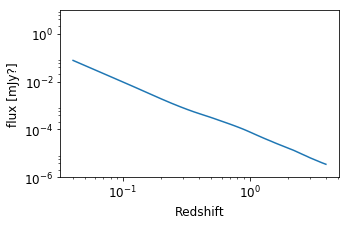

In [31]:
fig, ax = plt.subplots()
    
#offset_angle = np.angle(ra_diff.arcsec + dec_diff.arcsec * 1j)
#offset_dist = np.absolute(ra_diff.arcsec + dec_diff.arcsec * 1j)
#offset_distnorm = (offset_dist - np.min(offset_dist)) / np.max(offset_dist)

#cmap = mpl.colors.ListedColormap(sns.color_palette("Blues"))
#colors = cmap(depths['ferr_ap_irac_i1_mean'])  # The color is the angle
#colors[:, 3] = offset_distnorm  # The transparency is the distance

ax.loglog(redshifts, fluxes)


ax.set_xlabel('Redshift')
ax.set_ylabel('flux [mJy?]')




plt.rc('font', family='serif', serif='Times')
plt.rc('text') #, usetex=True)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('axes', labelsize=12)

column_width_cm = 8.9
width_cm = 1.4 * column_width_cm
hieght_cm = width_cm / 1.618
width_inches = width_cm/2.5
hieght_inches = hieght_cm/2.5
fig.set_size_inches(width_inches, hieght_inches)
plt.ylim(1.e-6,1.e1)
plt.savefig('f_v_z.pdf', bbox_inches='tight')
plt.savefig('f_v_z.png', bbox_inches='tight')

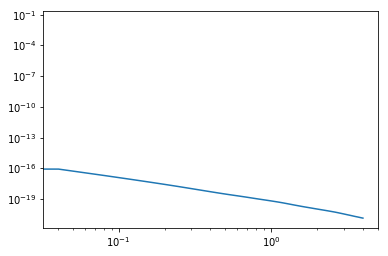

In [7]:
#This is the original plot from Yannick 
#It clearly has drastically different units
#Is this a diff between fnu and L?
plt.loglog(redshifts, fluxes)

## Beware

This is wrong because the SED we get from CIGALE is not redshifted.  Also, you are taking a SED of a galaxy having evolved over a given star formation history are put the resulting spectrum back in time. Wouldn't it be more appropriate to rebuild the SED corresponding to all the parameters of the best SED only changing the age of the galaxy according to the redshift?